In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler;
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset
white = pd.read_csv("./dataset/winequality-white.csv", sep=';')
red = pd.read_csv("./dataset/winequality-red.csv", sep=';')

In [4]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [7]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
pd.isnull(white).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
pd.isnull(red).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
white = white.drop_duplicates()

In [11]:
red = red.drop_duplicates()

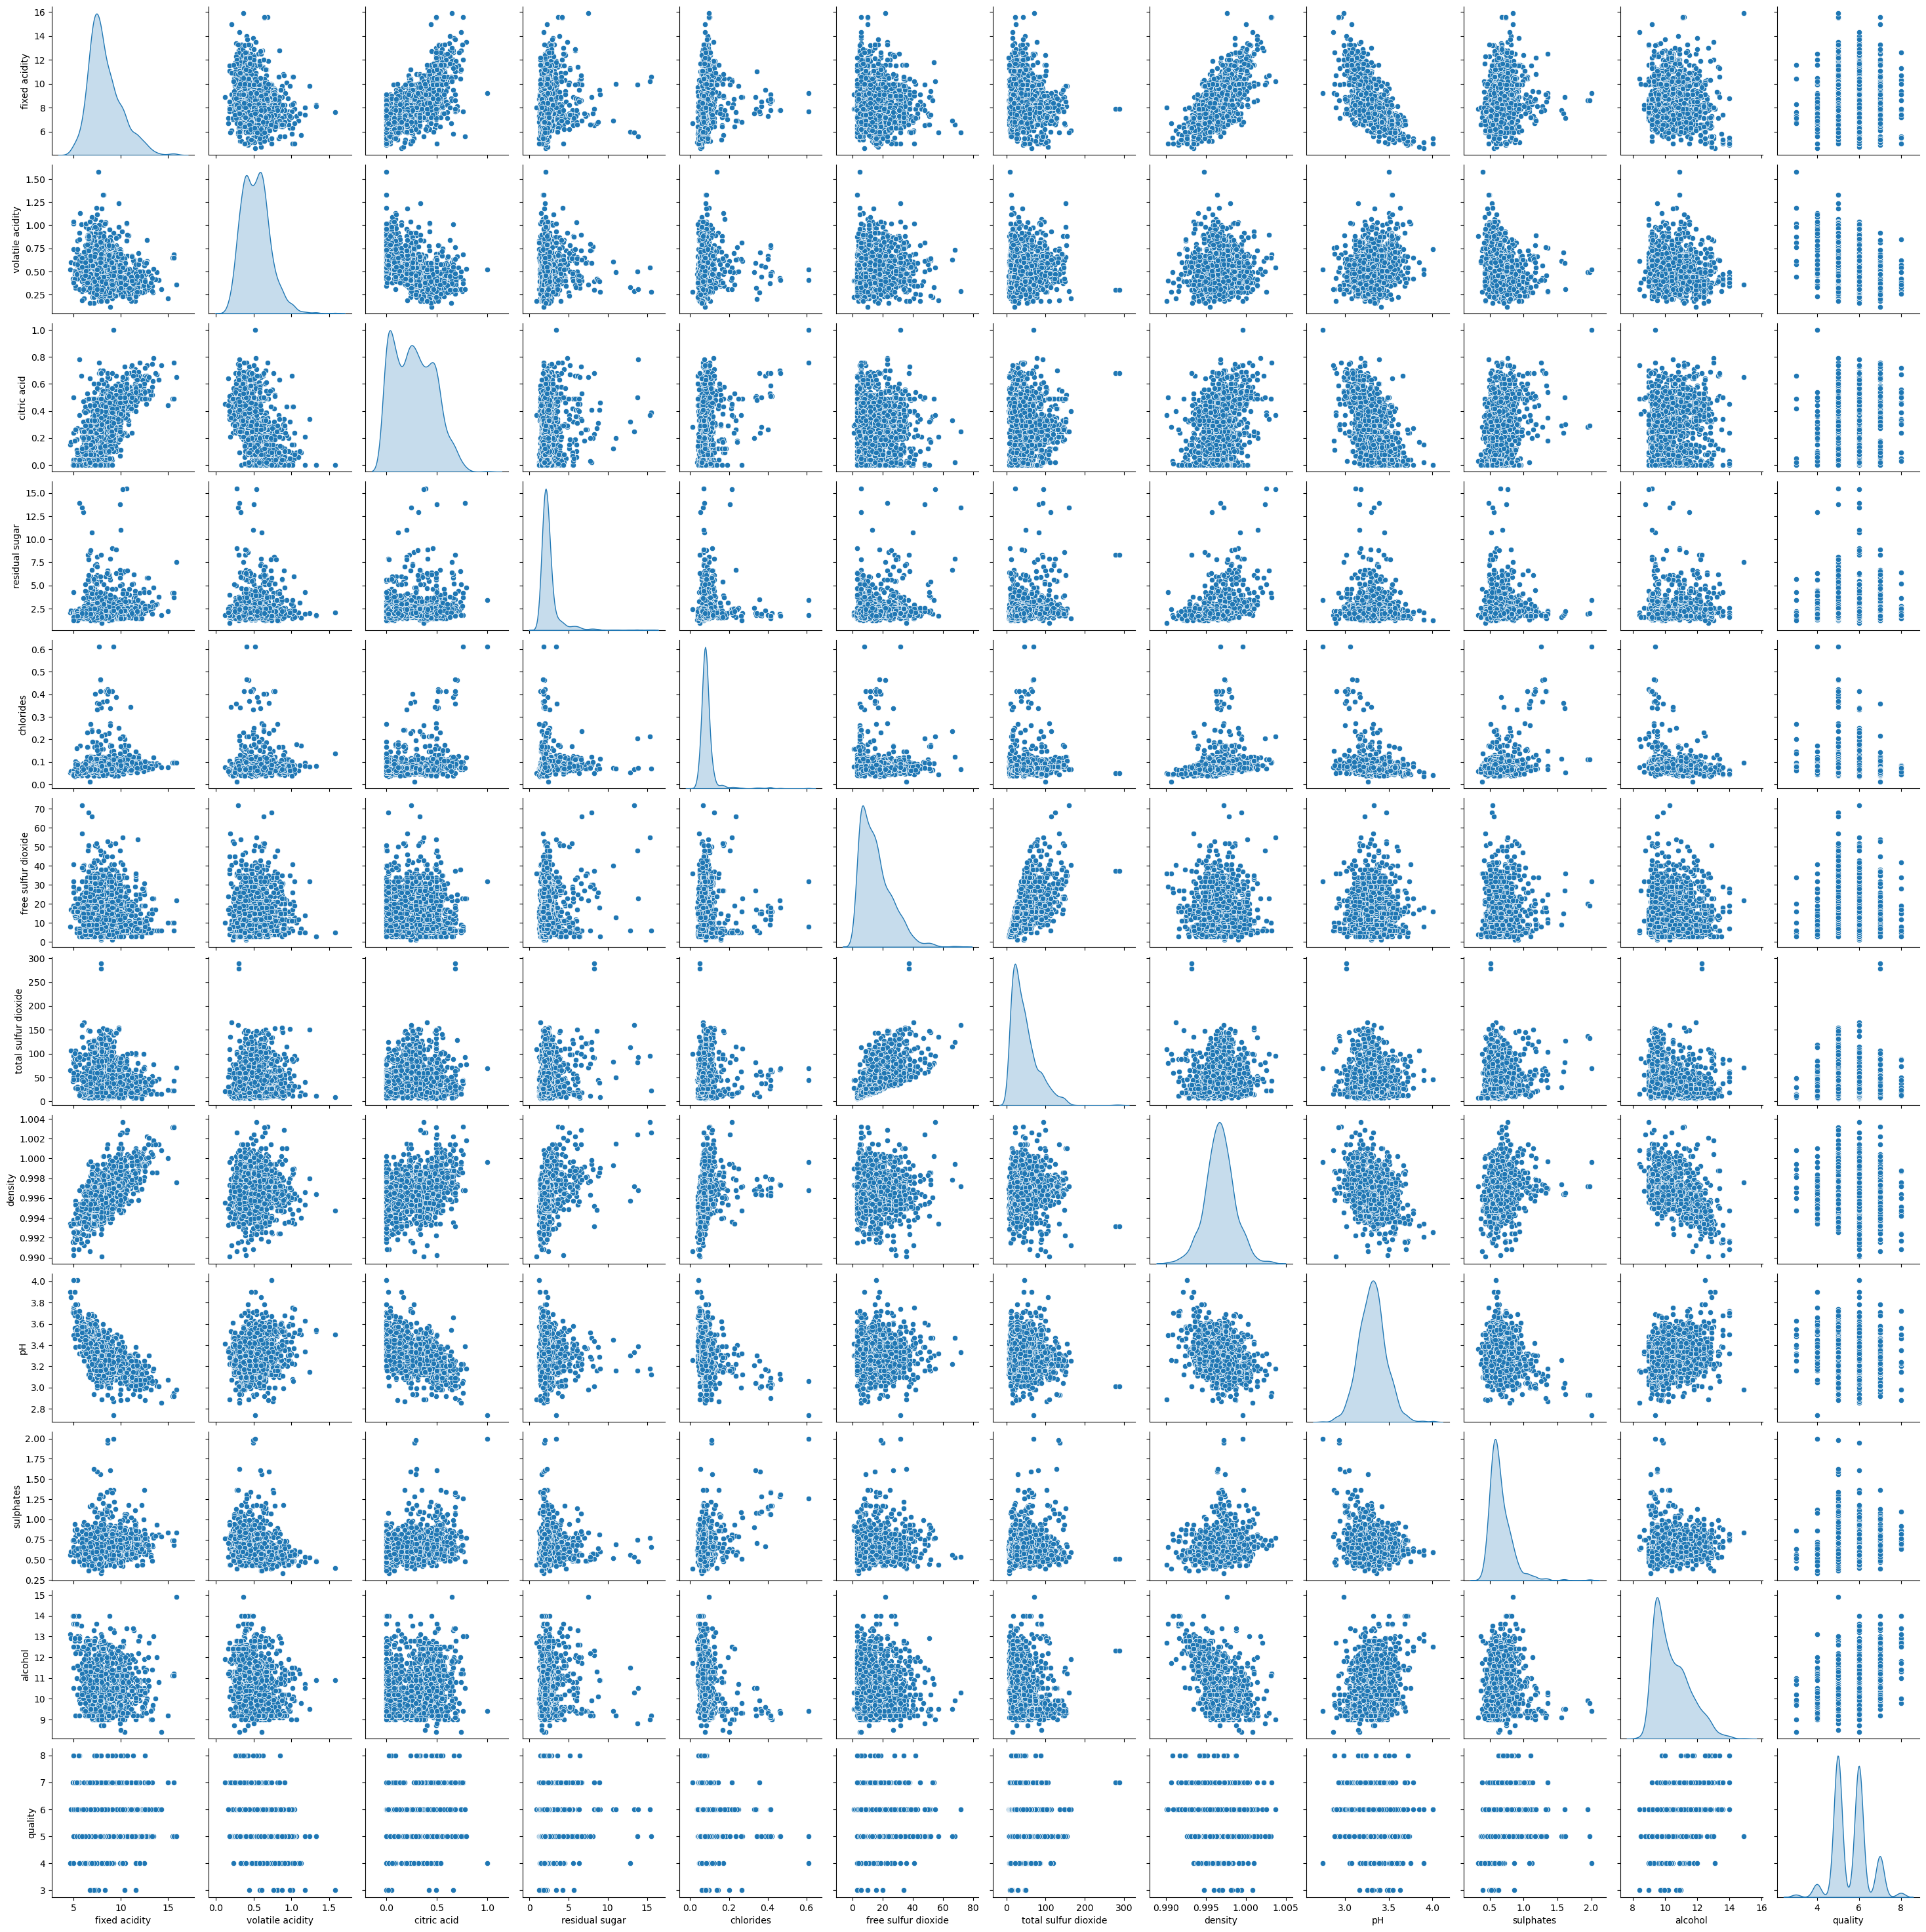

In [12]:
sns.pairplot(data=red, diag_kind = 'kde')

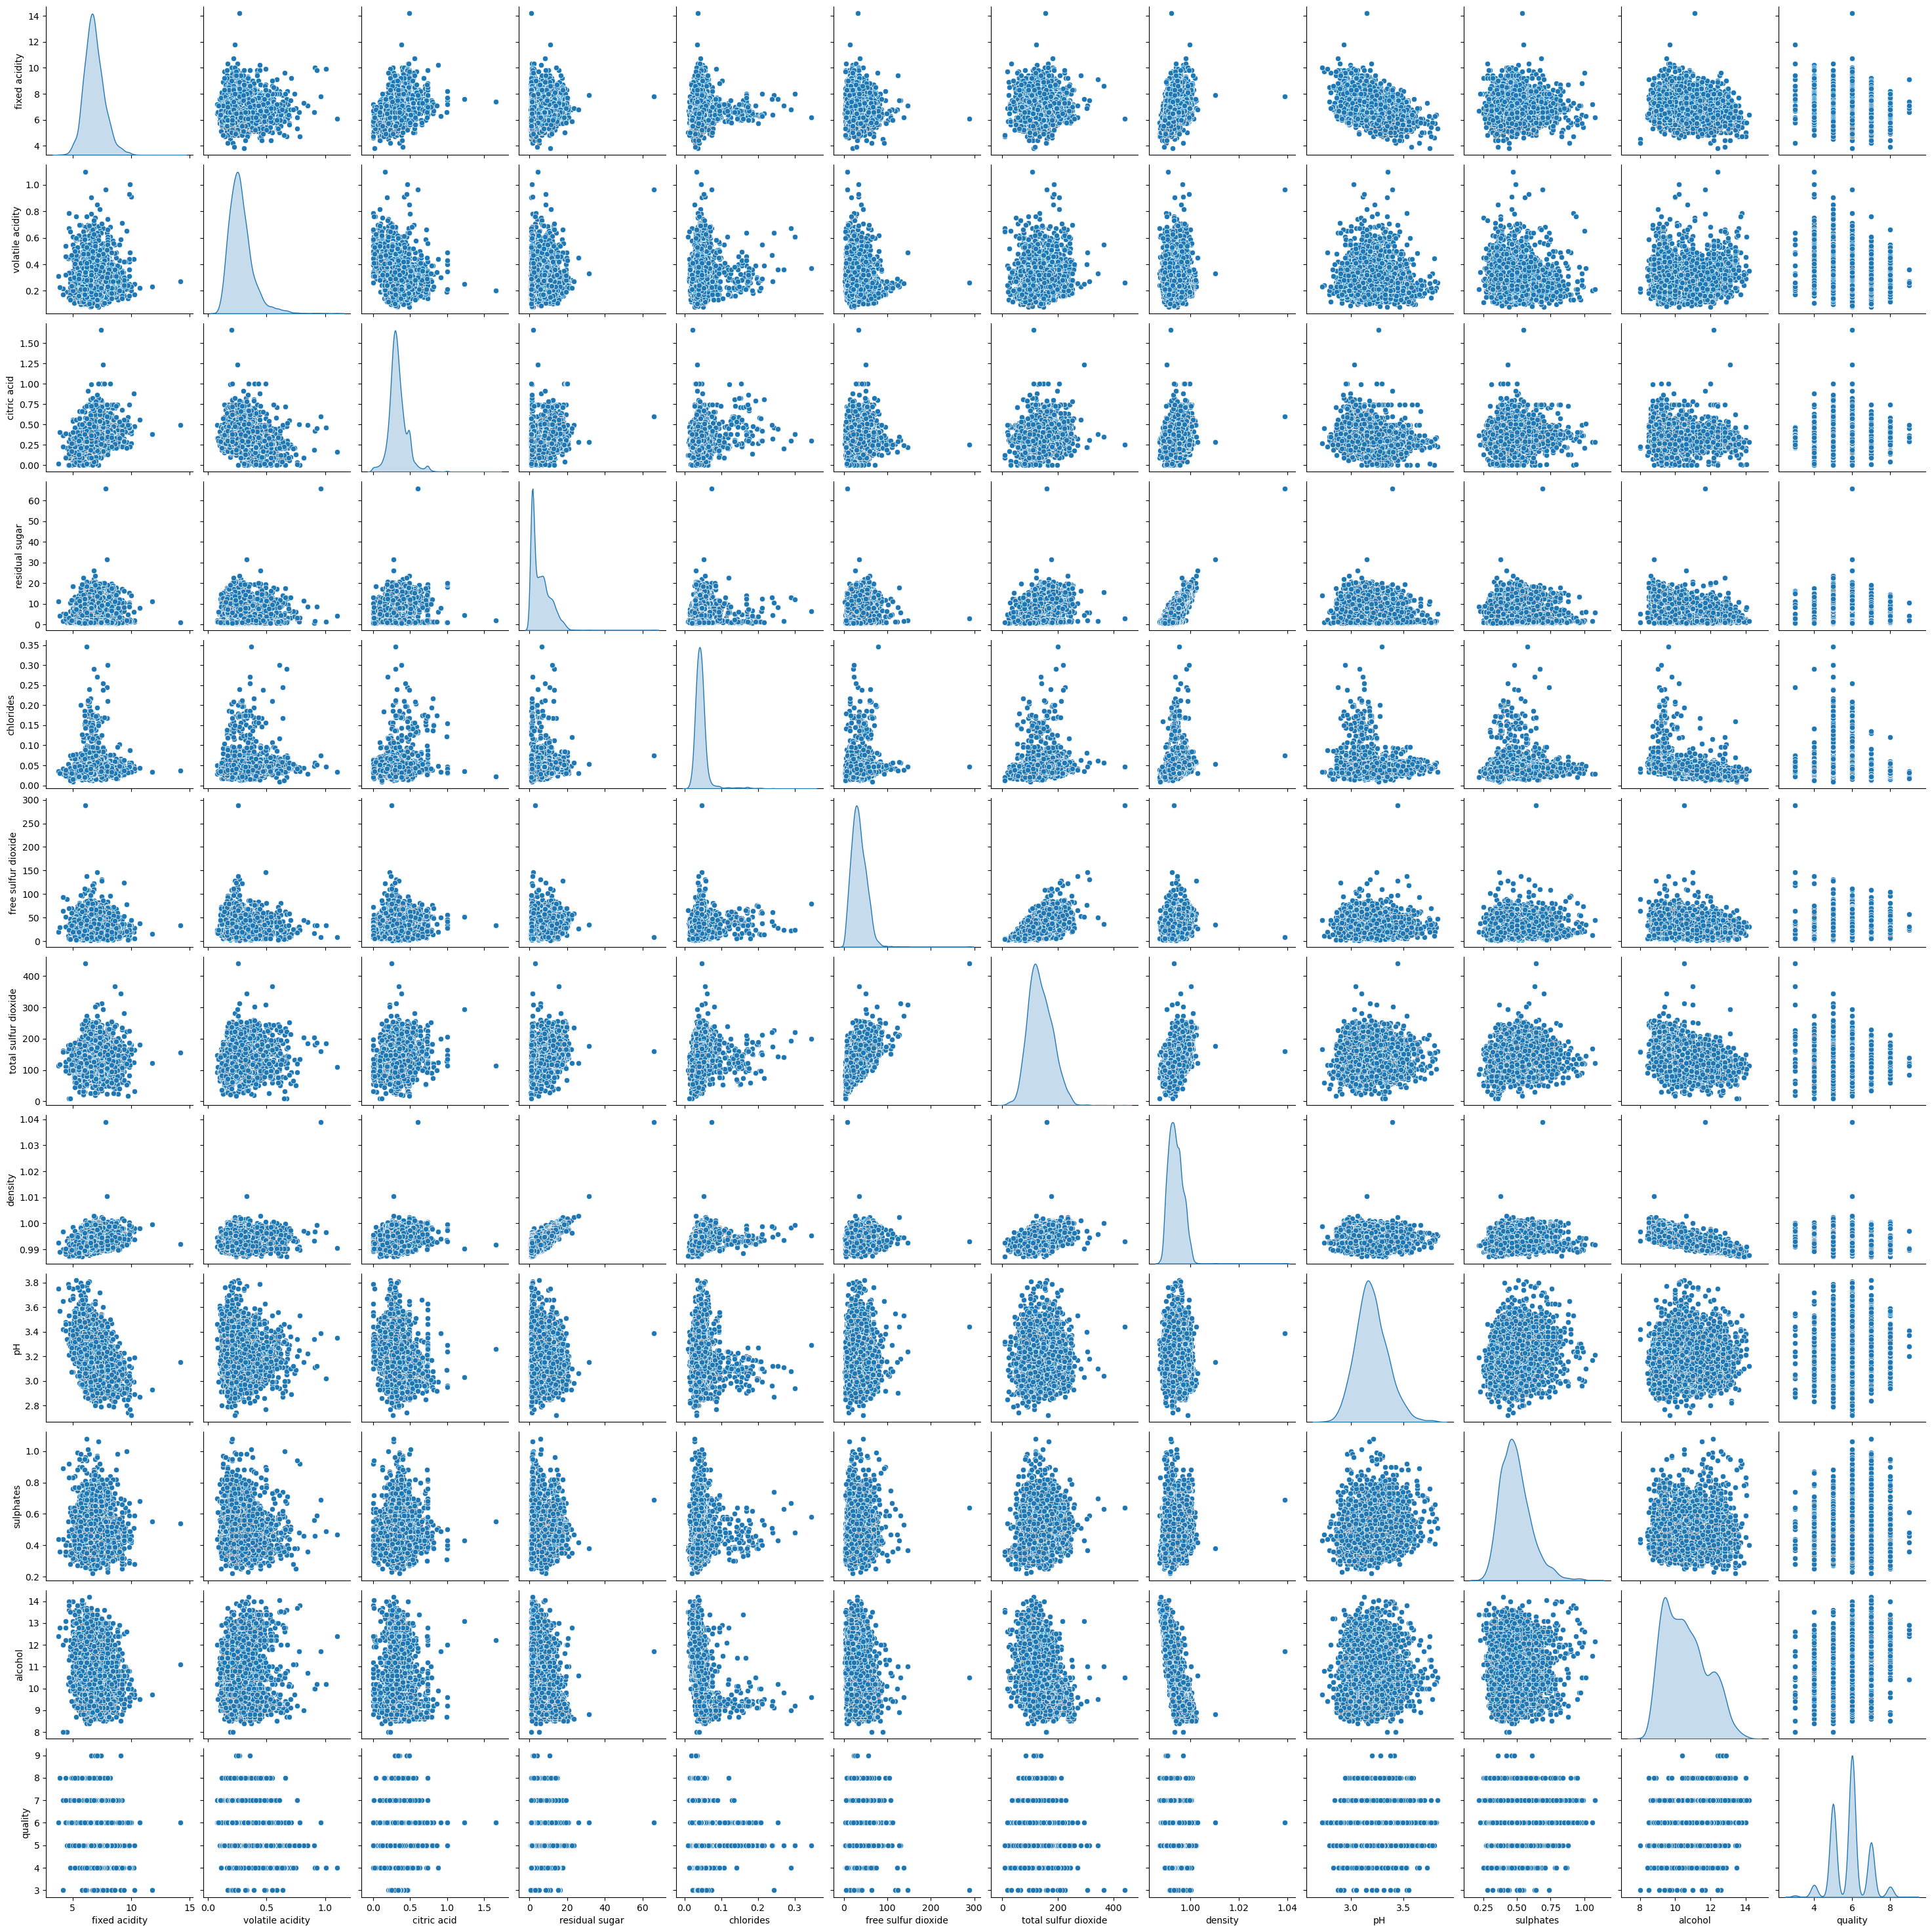

In [13]:
sns.pairplot(data=white, diag_kind = 'kde')

### 1.6. Merge two datasets

In [14]:
red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index = True)
wines.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  type  
5315     11.2        6     0  
5316      9.6        5     0  
5317      9.4        6     0  
5318     12.8        7     0  
5319     11.8        6     0

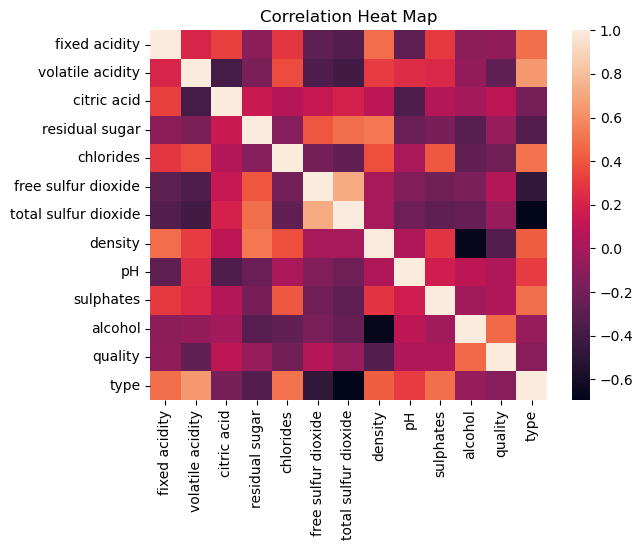

In [15]:
sns.heatmap(wines.corr())
plt.title("Correlation Heat Map")
plt.show()

In [16]:
X = wines.iloc[:, 0:11]
y = np.ravel(wines.type)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
models = [    
    Sequential([
        Dense(12, activation='sigmoid', input_shape=(11, )),
        Dense(1, activation='sigmoid')
    ]),
    
    Sequential([
        Dense(12, activation='sigmoid', input_shape=(11, )),
        Dense(8, activation='sigmoid'),
        Dense(1, activation='sigmoid')
    ]),
    
    Sequential([
        Dense(16, activation='relu', input_shape=(11, )),
        Dense(1, activation='sigmoid')
    ]),
    
    Sequential([
        Dense(16, activation='relu', input_shape=(11, )),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    
    Sequential([
        Dense(8, activation='relu', input_shape=(11, )),
        Dense(8, activation='relu', input_shape=(11, )),
        Dense(8, activation='relu', input_shape=(11, )),
        Dense(1, activation='sigmoid')
    ]),
]

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def train_model(model, epochs=50, batch_size=32, optimizer=Adam(learning_rate=0.001), metrics=['accuracy']):
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=metrics)
    
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping],
                        validation_data=(X_val, y_val),
                        verbose=1)
    
    return history

In [21]:
history_list = []

for i, model in enumerate(models, 1):
    print("Train model " + str(i))
    print("=" * 50)
    history_list.append(train_model(model))

Train model 1
Epoch 1/50
94/94 [==============================] - 1s 3ms/step - loss: 0.8203 - accuracy: 0.2857 - val_loss: 0.6431 - val_accuracy: 0.5302
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.8348 - val_loss: 0.4478 - val_accuracy: 0.9664
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.9775 - val_loss: 0.3397 - val_accuracy: 0.9785
Epoch 4/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.9832 - val_loss: 0.2743 - val_accuracy: 0.9812
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.2567 - accuracy: 0.9836 - val_loss: 0.2298 - val_accuracy: 0.9826
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9859 - val_loss: 0.1960 - val_accuracy: 0.9812
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.1875 - accuracy: 0.9886 - val_loss: 0.1698 - val_accuracy: 0.9839
Epoch 

94/94 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9926 - val_loss: 0.0449 - val_accuracy: 0.9906
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9930 - val_loss: 0.0424 - val_accuracy: 0.9906
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9930 - val_loss: 0.0400 - val_accuracy: 0.9906
Epoch 11/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9930 - val_loss: 0.0382 - val_accuracy: 0.9919
Epoch 12/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9933 - val_loss: 0.0368 - val_accuracy: 0.9919
Epoch 13/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9936 - val_loss: 0.0355 - val_accuracy: 0.9919
Epoch 14/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9936 - val_loss: 0.0345 - val_accuracy: 0.9919
Epoch 15/50
94/94 [=======

Epoch 16/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9960 - val_loss: 0.0250 - val_accuracy: 0.9946
Epoch 17/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9960 - val_loss: 0.0245 - val_accuracy: 0.9946
Epoch 18/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9960 - val_loss: 0.0239 - val_accuracy: 0.9946
Epoch 19/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9960 - val_loss: 0.0240 - val_accuracy: 0.9946
Epoch 20/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9960 - val_loss: 0.0235 - val_accuracy: 0.9946
Epoch 21/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9963 - val_loss: 0.0233 - val_accuracy: 0.9946
Epoch 22/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9963 - val_loss: 0.0230 - val_accuracy: 0.9946
Epoch 23/50
9

Epoch 24/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9970 - val_loss: 0.0214 - val_accuracy: 0.9919
Epoch 25/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9966 - val_loss: 0.0214 - val_accuracy: 0.9933
Epoch 26/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9970 - val_loss: 0.0217 - val_accuracy: 0.9919
Epoch 27/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9970 - val_loss: 0.0217 - val_accuracy: 0.9919
Train model 5
Epoch 1/50
94/94 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.8852 - val_loss: 0.0508 - val_accuracy: 0.9866
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9903 - val_loss: 0.0353 - val_accuracy: 0.9879
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9916 - val_loss: 0.0302 - val_accuracy: 0.9906
Ep

In [41]:
size = len(history_list)
row = size // 3 + (1 if size % 3 > 0 else 0)

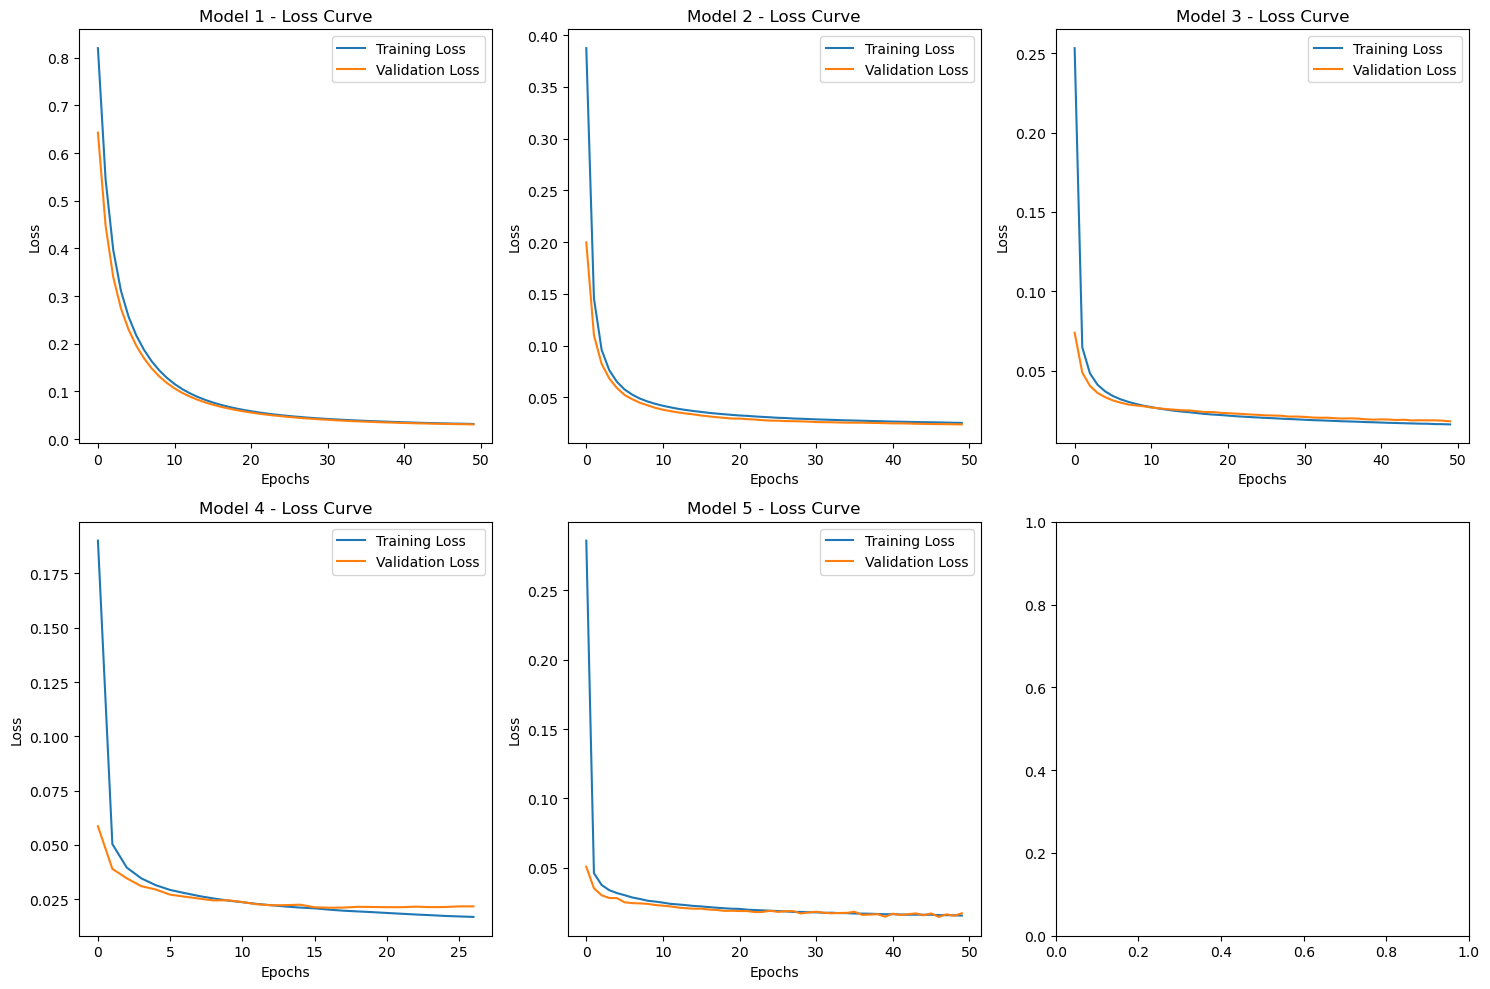

In [42]:
fig, axs = plt.subplots(row, 3, figsize=(15, 10))

for i, history in enumerate(history_list):
    ax = axs[i // 3, i % 3]
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.set_title(f'Model {i + 1} - Loss Curve')

plt.tight_layout()
plt.show()

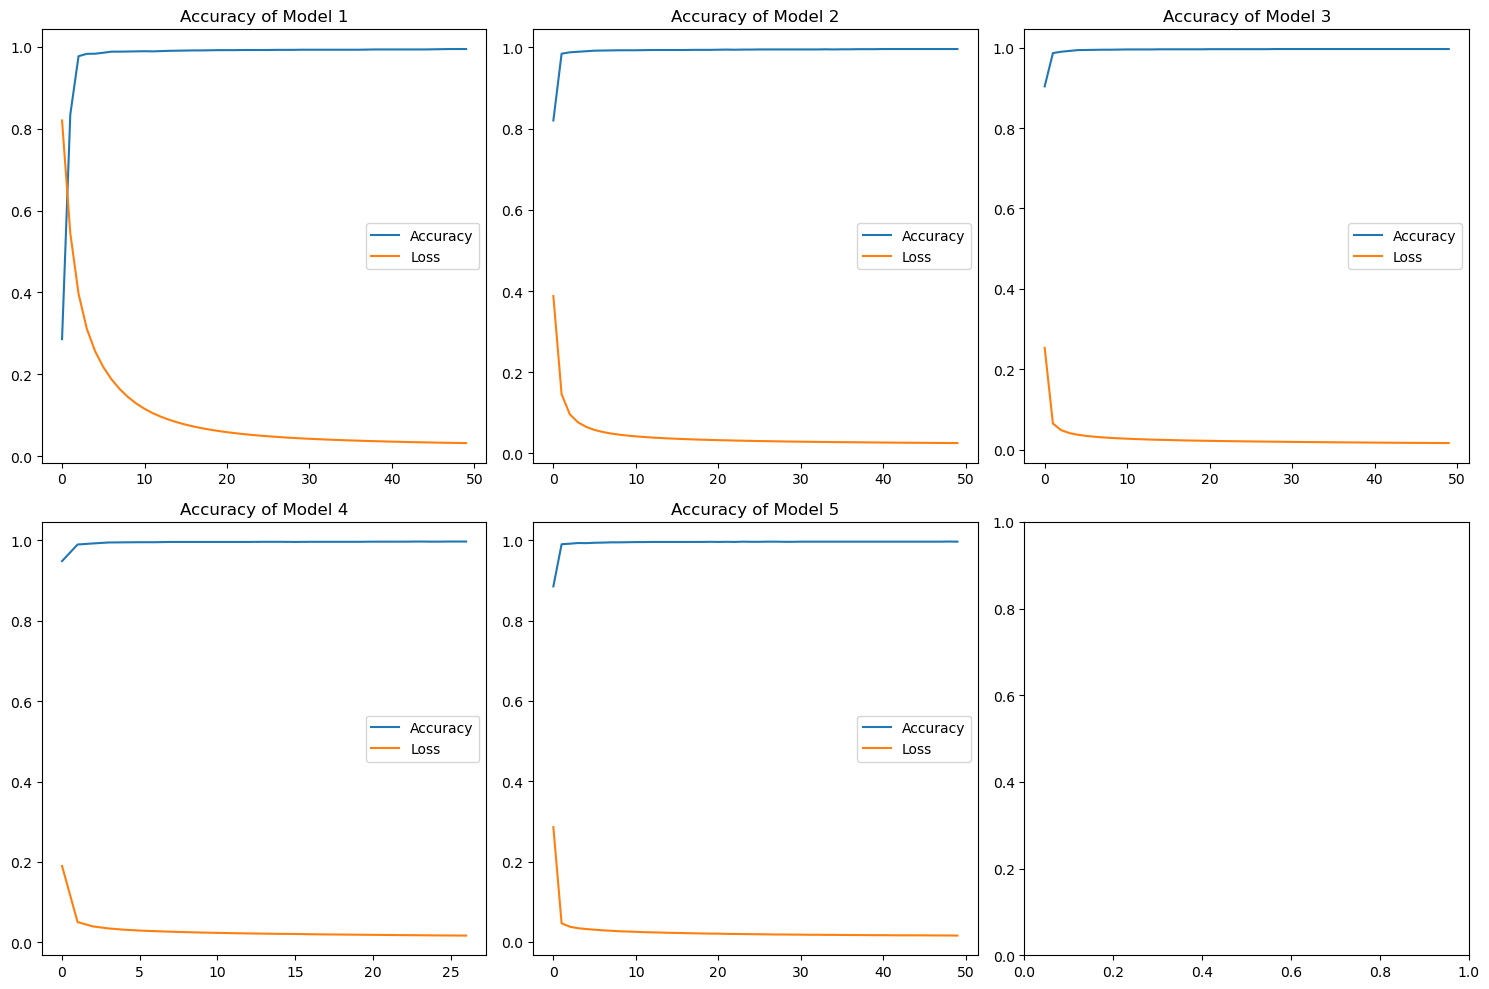

In [43]:
fig, axs = plt.subplots(row, 3, figsize=(15, 10))

for i, history in enumerate(history_list):
    ax = axs[i // 3, i % 3]
    ax.set_title(f'Accuracy of Model {i+1}')
    ax.plot(history.history['accuracy'], label='Accuracy')
    ax.plot(history.history['loss'], label='Loss')
    ax.legend()

plt.tight_layout()
plt.show()

In [25]:
from keras_tuner import RandomSearch
from tensorflow.keras import optimizers

def build_model(hp):
    model = Sequential()
    
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                   activation='relu', input_shape=(X_train.shape[1],)))

    model.add(Dense(units=hp.Int(f'units_2', min_value=32, max_value=512, step=32),
                       activation='relu', input_shape=(X_train.shape[1],)))
        
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer_name=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = optimizers.get(optimizer_name)
    optimizer.learning_rate.assign(learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [26]:
tf.keras.backend.clear_session()

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,
    executions_per_trial=3,
)

tuner.search(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Trial 30 Complete [00h 00m 08s]
val_accuracy: 0.9928411444028219

Best val_accuracy So Far: 0.9964205821355184
Total elapsed time: 00h 03m 47s
INFO:tensorflow:Oracle triggered exit


In [27]:
hyperparameters = tuner.get_best_hyperparameters(num_trials=10)

results= []

best_val_accuracy = 0.0
best_units_1 = None
best_units_2 = None
best_optimizer = None
best_learning_rate = None

for trial, params in enumerate(hyperparameters):
    units_1 = params.get('units_1')
    units_2 = params.get('units_2')
    optimizer = params.get('optimizer')
    learning_rate = params.get('learning_rate')
    
    model = build_model(params)
    model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    
    results.append({'Trial': trial+1, 
                    'Units_1': units_1, 
                    'Units_2': units_2,
                    'Optimizer': optimizer, 
                    'Learning-rate' : learning_rate,
                    'Val Accuracy': val_accuracy}
                  )
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_units_1 = units_1
        best_units_2 = units_2
        best_optimizer = optimizer
        best_learning_rate = learning_rate

Epoch 1/5
94/94 [==============================] - 1s 5ms/step - loss: 0.0822 - accuracy: 0.9809 - val_loss: 0.0253 - val_accuracy: 0.9933
Epoch 2/5
94/94 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9946 - val_loss: 0.0300 - val_accuracy: 0.9946
Epoch 3/5
94/94 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9943 - val_loss: 0.0715 - val_accuracy: 0.9839
Epoch 4/5
94/94 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9933 - val_loss: 0.0183 - val_accuracy: 0.9960
Epoch 5/5
24/24 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9960
Epoch 1/5
94/94 [==============================] - 1s 5ms/step - loss: 0.0816 - accuracy: 0.9849 - val_loss: 0.0361 - val_accuracy: 0.9906
Epoch 2/5
94/94 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9950 - val_loss: 0.0229 - val_accuracy: 0.9960
Epoch 3/5
94/94 [==============================] - 0s 3ms/step - loss

In [28]:
results_df = pd.DataFrame(results)

In [29]:
print("Best Hyperparameter Configuration")
print(f"Units_1 : {best_units_1}")
print(f"Units_2 : {best_units_2}")
print(f"Optimizer: {best_optimizer}")
print(f"Learning-rate: {best_learning_rate}")

Best Hyperparameter Configuration
Units_1 : 256
Units_2 : 480
Optimizer: adam
Learning-rate: 0.01


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [31]:
best_model = tuner.get_best_models(num_models=1)[0]

In [32]:
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

50/50 [==============================] - 0s 1ms/step
[[1162    1]
 [   5  428]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      0.99      0.99       433

    accuracy                           1.00      1596
   macro avg       1.00      0.99      1.00      1596
weighted avg       1.00      1.00      1.00      1596



Accuracy Score:
0.9962406015037594


In [33]:
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[0, 1]), 
             index=['true:White', 'true:Red'], 
             columns=['pred:White', 'pred:Red']
            )

pred:White  pred:Red
true:White        1162         1
true:Red             5       428

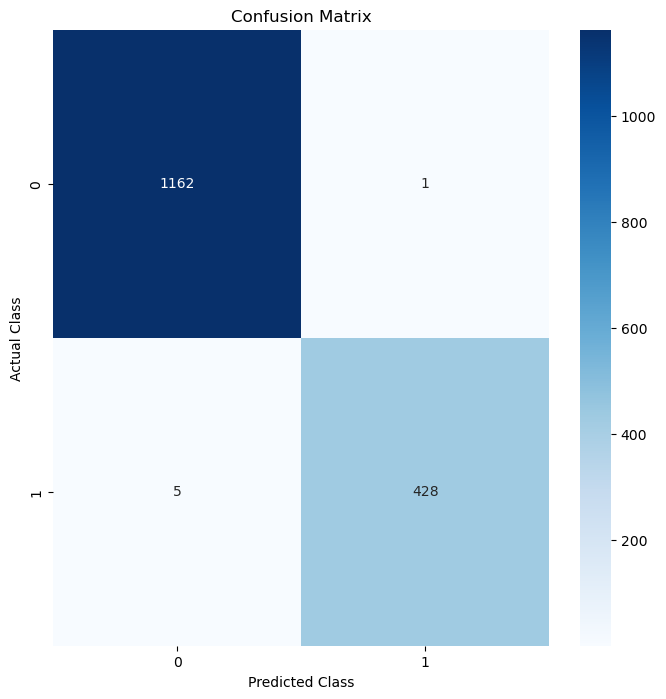

In [34]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [35]:
y_test_prob = best_model.predict(X_test)

50/50 [==============================] - 0s 1ms/step


In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

In [37]:
auc_score = roc_auc_score(y_test, y_test_prob)

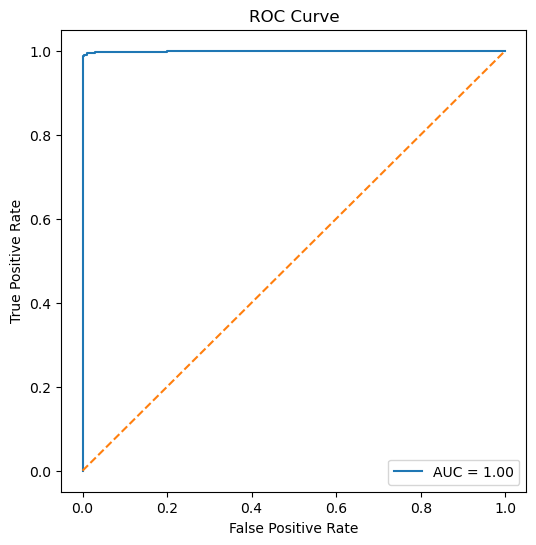

In [38]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [39]:
y_pred = np.round(best_model.predict(X_test))
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy : %.5f' % acc)
print('Test Loss     : %.5f' % loss)

loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy : %.5f' % acc)
print('Train Loss     : %.5f' % loss)

50/50 [==============================] - 0s 1ms/step
Test Accuracy : 0.99185
Test Loss     : 0.04940
Train Accuracy : 0.99396
Train Loss     : 0.05420
